In [55]:
import os
import datetime
import IPython
import IPython.display
import math
import numpy as np
from numpy.linalg import eig
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import pandas as pd 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib as mpl
import matplotlib.pyplot as plt

from time import sleep
import glob

from joblib import dump, load

%matplotlib inline

In [2]:
#path = r'D:\Dataset luanvan\PHUNG\Hydraulic'
#all_files = glob.glob(path + "/*.csv")
#li = []
#for filename in all_files:
#    df = pd.read_csv(filename, index_col = None, header = 0, sep = ';')
    #li.append(df)
#Nacelle_raw = pd.concat(li, axis = 0, ignore_index = True)

#Gearbox, Hydraulic, Yaw pressure and temperature
Gearbox_bear = pd.read_csv('D:/Dataset luanvan/PHUNG/Gearbox/T1_T2_T3/Gearbox_bearing_temperature_T123.csv', sep =';')
Gearbox_oil = pd.read_csv('D:/Dataset luanvan/PHUNG/Gearbox/T1_T2_T3/Gearbox_oil_temperature_T123.csv', sep = ';')
Hydraulic_oil_temp = pd.read_csv('D:/Dataset luanvan/PHUNG/Hydraulic/T1_T2_T3/Hydraulic unit oil temperatureT1_T2_T3.csv', sep =';')
Hydraulic_press = pd.read_csv('D:/Dataset luanvan/PHUNG/Hydraulic/T1_T2_T3/Hydraulic unit pressure(bar)T1_T2_T3.csv', sep =';')
Yaw_break_press_temp = pd.read_csv('D:/Dataset luanvan/PHUNG/Yaw/Yaw brake pressure_T12123.csv', sep =';')


#Nacelle generator temperature
Nacelle_gen_temp_noncoup_temp = pd.read_csv('D:/Dataset luanvan/PHUNG/Nacelle/Gen bearing temp coup-non T12_T1_T2_T3/Generator_bearing_temperature_non_coupling_sideT12123.csv', sep = ';')
Nacelle_gen_temp_coup_temp = pd.read_csv('D:/Dataset luanvan/PHUNG/Nacelle/Gen bearing temp coup-non T12_T1_T2_T3/Generator_bearing_temperature_coupling_sideT12123.csv', sep = ';')

#Generator winding sensor temperature T12 T1 T2 T3
Gen_winding_temp_tmp = pd.read_csv('D:/Dataset luanvan/PHUNG/Nacelle/Gen_winding_temp_T12123/Generator_1_winding_temperatureT12123.csv', sep = ';')
Gen_winding_temp2_tmp = pd.read_csv('D:/Dataset luanvan/PHUNG/Nacelle/Gen_winding_temp_T12123/Generator_2_winding_temperature_highT12123.csv', sep = ';')
Gen_winding_temp3_tmp = pd.read_csv('D:/Dataset luanvan/PHUNG/Nacelle/Gen_winding_temp_T12123/Generator_3_winding_temperature_highT12123.csv', sep = ';')
Gen_sliprings_temp_tmp = pd.read_csv('D:/Dataset luanvan/PHUNG/Nacelle/Gen_winding_temp_T12123/Generator_sliprings_temperatureT12123.csv', sep = ';')

#Mean RMS value inverter current phase T12 T1 T2 T3
Inverter_current_p1_tmp = pd.read_csv('D:/Dataset luanvan/PHUNG/Nacelle/Mean_RMS_value_Inverter_Current_phase_T12123/Mean_RMS_value_of_Rotor_Inverter_Current_Phase1_T12123.csv', sep = ';')
Inverter_current_p2_tmp = pd.read_csv('D:/Dataset luanvan/PHUNG/Nacelle/Mean_RMS_value_Inverter_Current_phase_T12123/Mean_RMS_value_of_Rotor_Inverter_Current_Phase2_T12123.csv', sep = ';')
Inverter_current_p3_tmp = pd.read_csv('D:/Dataset luanvan/PHUNG/Nacelle/Mean_RMS_value_Inverter_Current_phase_T12123/Mean_RMS_value_of_Rotor_Inverter_Current_Phase3_T12123.csv', sep = ';')

#RMS value phase 1 T12 T1 T2 T3
Grid_inverter_current_tmp = pd.read_csv('D:/Dataset luanvan/PHUNG/Nacelle/RMS_value_phase_T12123/RMS_value_of_grid_inverter_current_phase1_T12123.csv', sep = ';')
Grid_voltage_tmp = pd.read_csv('D:/Dataset luanvan/PHUNG/Nacelle/RMS_value_phase_T12123/RMS_value_of_grid_voltage_phase1_T12123.csv', sep = ';')
Line_current_tmp = pd.read_csv('D:/Dataset luanvan/PHUNG/Nacelle/RMS_value_phase_T12123/RMS_value_of_line_current_phase1_T12123.csv', sep = ';')
Stator_current_tmp = pd.read_csv('D:/Dataset luanvan/PHUNG/Nacelle/RMS_value_phase_T12123/RMS_value_of_stator_current_phase1_T12123.csv', sep = ';')



In [3]:
files = []
path_file = ['Pitch_angle', 'Rotor speed', 'Winddir', 'Windspeed']
for i in path_file:
    path = f'D:/Dataset luanvan/PHUNG/Wind_Rotor/{i}'
    files_temp = os.listdir(path)
    files.append(files_temp)
    
Pitch_angleT123 = files[0]
Rotor_speedT123 = files[1]
Wind_dirT123 = files[2]
Wind_speedT123 = files[3]

Rotor_speedT123[0] = pd.read_csv(f'D:/Dataset luanvan/PHUNG/Wind_Rotor/Rotor speed/Amb_Pitch_Windsp_Winddr_Rotor_T2.csv', sep = ',')
Rotor_speedT123[1] = pd.read_csv(f'D:/Dataset luanvan/PHUNG/Wind_Rotor/Rotor speed/Rotor_speed_T1.csv', sep = ';')
Rotor_speedT123[2] = pd.read_csv(f'D:/Dataset luanvan/PHUNG/Wind_Rotor/Rotor speed/Rotor_speed_T3.csv', sep = ';')


for i in range(3):
    Pitch_angleT123[i] = pd.read_csv(f'D:/Dataset luanvan/PHUNG/Wind_Rotor/Pitch_angle/{Pitch_angleT123[i]}', sep = ',')
    Pitch_angleT123[i]['Time'] = pd.to_datetime(Pitch_angleT123[i]['Time'], dayfirst = True)
    #Rotor_speedT123[i] = pd.read_csv(f'D:/Dataset luanvan/PHUNG/Wind_Rotor/Rotor speed/{Rotor_speedT123[i]}', sep = ',')
    Rotor_speedT123[i]['Time'] = pd.to_datetime(Rotor_speedT123[i]['Time'], dayfirst = True)
    Wind_dirT123[i] = pd.read_csv(f'D:/Dataset luanvan/PHUNG/Wind_Rotor/Winddir/{Wind_dirT123[i]}', sep = ',')
    Wind_dirT123[i]['Time'] = pd.to_datetime(Wind_dirT123[i]['Time'], dayfirst = True)
    Wind_speedT123[i] = pd.read_csv(f'D:/Dataset luanvan/PHUNG/Wind_Rotor/Windspeed/{Wind_speedT123[i]}', sep = ',')
    Wind_speedT123[i]['Time'] = pd.to_datetime(Wind_speedT123[i]['Time'], dayfirst = True)

Pitch_angle = pd.concat(Pitch_angleT123, axis = 0, ignore_index = False)
Pitch_angle = Pitch_angle.reset_index(drop = True)

Wind_dirT123[1] = pd.concat([Rotor_speedT123[0].iloc[:, 0], Rotor_speedT123[0].iloc[:, 58:76]], axis = 1, 
                               ignore_index = False)

Rotor_speedT123[0] = pd.concat([Rotor_speedT123[0].iloc[:, 0], Rotor_speedT123[0].iloc[:, 39:57]], axis = 1, 
                               ignore_index = False)
Rotor_speed = pd.concat(Rotor_speedT123, axis = 0, ignore_index = False)
Rotor_speed = Rotor_speed.reset_index(drop = True)


Wind_dir = pd.concat(Wind_dirT123, axis = 0, ignore_index = False)
Wind_dir = Wind_dir.reset_index(drop = True)

Wind_speed = pd.concat(Wind_speedT123, axis = 0, ignore_index = False)
Wind_speed = Wind_speed.reset_index(drop = True)
#print(Pitch_angle.loc[Pitch_angle['Time'] == '2022-03-23 23:59:00.07'].index.values[0])
idx_tmp = Pitch_angle.index[Pitch_angle.loc[Pitch_angle['Time'] == '2022-03-23 23:59:00.07'].index.values[0]+1:]

Pitch_angle = Pitch_angle.drop(index = idx_tmp, axis = 0, inplace = False)

#Rotor_speed = Rotor_speed.drop(index = idx_tmp, axis = 0, inplace = False)
Wind_dir = Wind_dir.drop(index = idx_tmp, axis = 0, inplace = False)
Wind_speed = Wind_speed.drop(index = idx_tmp, axis = 0, inplace = False)
#print(Rotor_speedT123[0].iloc[:, 39:57])
#print(Rotor_speedT123[0].iloc[:, 0])



In [4]:
#print(Nacelle_raw)
#print(Gearbox_temp)

#Drop December out of the Yaw dataframe 
def drop_december(x):
    x['Time'] = pd.to_datetime(x['Time'], dayfirst = True)
    y = x.copy()
    a = x[x['Time'] == '2021-12-31 23:59:00.07'].index.values[0]
    y = y.drop(x.index[:a+1], inplace = False)
    y = y.reset_index(drop = True)
    return y

#####################################################################
#Yaw, Nacelle temp, press
Yaw_break_press = drop_december(Yaw_break_press_temp)
Nacelle_gen_temp_coup = drop_december(Nacelle_gen_temp_coup_temp)
Nacelle_gen_temp_noncoup = drop_december(Nacelle_gen_temp_noncoup_temp)

#Generator winding temperature
Gen_winding_temp = drop_december(Gen_winding_temp_tmp)
Gen_winding_temp2 = drop_december(Gen_winding_temp2_tmp)
Gen_winding_temp3 = drop_december(Gen_winding_temp3_tmp)
Gen_sliprings_temp = drop_december(Gen_sliprings_temp_tmp)

#RMS Value Inverter Current phase 1 2 3
Inverter_current_p1 = drop_december(Inverter_current_p1_tmp)
Inverter_current_p2 = drop_december(Inverter_current_p2_tmp)
Inverter_current_p3 = drop_december(Inverter_current_p3_tmp)

#RMS Value Grid, Line, Stator
Grid_inverter_current = drop_december(Grid_inverter_current_tmp)
Grid_voltage = drop_december(Grid_voltage_tmp)
Line_current = drop_december(Line_current_tmp)
Stator_current = drop_december(Stator_current_tmp)
######################################################################

def drop_datetime(x,y):
    c = pd.DataFrame()
    d = x.drop([y], axis = 1)
    c = pd.concat([c, d], copy = True)
    x[y] = pd.to_datetime(x[y], dayfirst = True)
    return x, c

#####################################################################
#Yaw, Nacelle temp, press
Gearbox_oil, Gearbox_oil_WT = drop_datetime(Gearbox_oil,'Time')
Gearbox_bear, Gearbox_bear_WT = drop_datetime(Gearbox_bear,'Time')
Hydraulic_oil_temp, Hydraulic_oil_temp_WT = drop_datetime(Hydraulic_oil_temp,'Time')
Hydraulic_press, Hydraulic_press_WT = drop_datetime(Hydraulic_press,'Time')
Yaw_break_press, Yaw_break_press_WT = drop_datetime(Yaw_break_press, 'Time')
Nacelle_gen_temp_coup, Nacelle_gen_temp_coup_WT = drop_datetime(Nacelle_gen_temp_coup, 'Time')
Nacelle_gen_temp_noncoup, Nacelle_gen_temp_noncoup_WT = drop_datetime(Nacelle_gen_temp_noncoup, 'Time')

Gen_winding_temp, Gen_winding_temp_WT = drop_datetime(Gen_winding_temp, 'Time')
Gen_winding_temp2, Gen_winding_temp2_WT = drop_datetime(Gen_winding_temp2, 'Time')
Gen_winding_temp3, Gen_winding_temp3_WT = drop_datetime(Gen_winding_temp3, 'Time')
Gen_sliprings_temp, Gen_sliprings_temp_WT = drop_datetime(Gen_sliprings_temp, 'Time')

Inverter_current_p1, Inverter_current_p1_WT = drop_datetime(Inverter_current_p1, 'Time')
Inverter_current_p2, Inverter_current_p2_WT = drop_datetime(Inverter_current_p2, 'Time')
Inverter_current_p3, Inverter_current_p3_WT = drop_datetime(Inverter_current_p3, 'Time')

Grid_inverter_current, Grid_inverter_current_WT  = drop_datetime(Grid_inverter_current, 'Time')
Grid_voltage, Grid_voltage_WT = drop_datetime(Grid_voltage, 'Time')
Line_current, Line_current_WT = drop_datetime(Line_current, 'Time')
Stator_current, Stator_current_WT = drop_datetime(Stator_current, 'Time')


Pitch_angle, Pitch_angle_WT = drop_datetime(Pitch_angle, 'Time')
Rotor_speed, Rotor_speed_WT = drop_datetime(Rotor_speed, 'Time')
Wind_dir, Wind_dir_WT = drop_datetime(Wind_dir, 'Time')
Wind_speed, Wind_speed_WT = drop_datetime(Wind_speed, 'Time')


#######################################################################

def replace_nan(x):  
    for i in x.columns:
        x[i] = x[i].replace(np.nan, 0)
    return x

Gearbox_oil_WT = replace_nan(Gearbox_oil_WT)
Gearbox_bear_WT = replace_nan(Gearbox_bear_WT)
Hydraulic_oil_temp_WT = replace_nan(Hydraulic_oil_temp_WT)
Hydraulic_press_WT = replace_nan(Hydraulic_press_WT)
Yaw_break_press_WT = replace_nan(Yaw_break_press_WT)
Nacelle_gen_temp_coup_WT = replace_nan(Nacelle_gen_temp_coup_WT)
Nacelle_gen_temp_noncoup_WT = replace_nan(Nacelle_gen_temp_noncoup_WT)
#print(Gearbox_bear_WT.head(100))

#######################################
Gen_var = [Gen_winding_temp_WT, Gen_winding_temp2_WT, Gen_winding_temp3_WT, Gen_sliprings_temp_WT]
Inverter_var = [Inverter_current_p1_WT, Inverter_current_p2_WT, Inverter_current_p3_WT]
RMS_value_var = [Grid_inverter_current_WT, Grid_voltage_WT, Line_current_WT, Stator_current_WT]
Nacelle_var = [Gearbox_oil_WT, Gearbox_bear_WT, Hydraulic_press_WT, Nacelle_gen_temp_coup_WT, 
           Nacelle_gen_temp_noncoup_WT, Yaw_break_press_WT] # - Hydraulic_oil_temp_WT
Nature_var = [Pitch_angle_WT, Wind_speed_WT, Rotor_speed_WT, Wind_dir_WT]
def Replace_var(x):
    for i in x:
        i = replace_nan(i)

Replace_var(Gen_var)
Replace_var(Inverter_var)
Replace_var(RMS_value_var)
Replace_var(Nature_var)
#print(Inverter_current_p2_WT)

def line_graph_all(data, index_row1, index_row2, x_label, y_label, chart_name):
    fig = plt.figure(figsize=(15,10))
    plt.plot(data[data.columns][index_row1:index_row2], ls = '-', ms = 1)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(chart_name)
    plt.legend(loc = 1)
    plt.show()


    
def line_graph(data, index_column, index_row1, index_row2, x_label, y_label, chart_name):
    fig = plt.figure(figsize=(15,10))
    plt.plot(data[data.columns[index_column]][index_row1:index_row2], ls = '-', ms = 1)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(chart_name)
    plt.legend(loc = 1)
    plt.show()
#line_graph(Inverter_current_p1_WT, 0, 118079, "Time", "Current phase 1 - A", "WT01")


In [5]:
for i in Gen_var:
    print(i.columns[17] + ' ' 'zero values count:',i[i.columns[17]].loc[i[i.columns[17]] == 0].count() )


WT24 - Generator 1 winding temperature zero values count: 118080
WT24 - Generator 2 winding temperature high zero values count: 118080
WT24 - Generator 3 winding temperature high zero values count: 118080
WT24 - Generator’s sliprings temperature zero values count: 118080


In [6]:
#Gearbox_bear_WT = Gearbox_bear_WT.drop(columns = Gearbox_bear_WT.columns[16:18], axis = 1, inplace = False)
#Gearbox_bear_WT
for i in range(len(Gen_var)):
    Gen_var[i] = Gen_var[i].drop(columns = Gen_var[i].columns[16:18], axis = 1, inplace = False)
for i in range(len(Inverter_var)):
    Inverter_var[i] = Inverter_var[i].drop(columns = Inverter_var[i].columns[16:18], axis = 1, inplace = False)
for i in range(len(Nacelle_var)):
    Nacelle_var[i] = Nacelle_var[i].drop(columns = Nacelle_var[i].columns[16:18], axis = 1, inplace = False)
for i in range(len(RMS_value_var)):
    RMS_value_var[i] = RMS_value_var[i].drop(columns = RMS_value_var[i].columns[16:18], axis = 1, inplace = False)
for i in range(len(Nature_var)):
    Nature_var[i] = Nature_var[i].drop(columns = Nature_var[i].columns[16:18], axis = 1, inplace = False)
#Nacelle_var_temp = Nacelle_var.copy().append(Hydraulic_oil_temp_WT)
#Nacelle_var.copy().pop(len(Nacelle_var)-1)

Gen_var_tmp = pd.concat(Gen_var, axis = 1, ignore_index = False)
Inverter_var_tmp = pd.concat(Inverter_var, axis = 1, ignore_index = False)
Nacelle_var_temp_tmp = pd.concat(Nacelle_var, axis = 1, ignore_index = False)
Nacelle_var_temp_tmp = pd.concat([Nacelle_var_temp_tmp, Hydraulic_oil_temp_WT], axis = 1, ignore_index = False)
RMS_value_tmp = pd.concat(RMS_value_var, axis = 1, ignore_index = False)
Nature_var_tmp = pd.concat(Nature_var, axis = 1, ignore_index = False)

WT_tmp = pd.concat([Gen_var_tmp, Inverter_var_tmp, Nacelle_var_temp_tmp, RMS_value_tmp, Nature_var_tmp], 
                   axis = 1, ignore_index = False)

WT = []
number = []
for i in range(0,22):
    number.append(i*16)
#Temp = pd.concat(Gen_var, axis = 1, ignore_index = False )
#for i in range(len(Gen_var[0].columns)):
for i in range(16):
    WT_temp_tmp = WT_tmp.iloc[:, list(map(lambda x: x+i, number))]
    WT.append(WT_temp_tmp)




In [8]:
#for i in WT_temp:
#    print(i.columns)
#Temp.iloc[:,[0,16,32,48]]
#for i in range(len(Gen_var[0].columns)):
for i in WT: #columns temperature: 0, 1, 2, 3, 7, 8, 10, 11, 13.
    i.iloc[:, [0, 1, 2, 3, 7, 8, 10, 11, 13]] = i.iloc[:, [0, 1, 2, 3, 7, 8, 10, 11, 13]].apply(lambda x: round((x-32.0)*(5.0/9.0), 2), 
                                                                                                axis = 0)
Fault_WT = pd.read_excel('D:/Dataset luanvan/TTWP AF Turbine.xlsx', sheet_name= 'His')
Fault_WT = Fault_WT.rename(columns = {"Bắt đầu\n[dd/mm/yy hh:mm]": "Start date", "Kết thúc\n[dd/mm/yy hh:mm]" : "End date"})
Fault_WT['Start date'] = pd.to_datetime(Fault_WT['Start date'], dayfirst = True)
Fault_WT['End date'] = pd.to_datetime(Fault_WT['End date'], dayfirst = True)  

Turbine_name = Fault_WT['Turbine'].values
My_list_turbine_name = list(dict.fromkeys(Turbine_name))
Fault_WT = Fault_WT.iloc[:, [0, 2, 3, 8, 9, 10]]

fault_all_wt = []
for i in My_list_turbine_name:
    Temp_fault = Fault_WT.loc[Fault_WT['Turbine'] == i]
    fault_all_wt.append(Temp_fault)
Fault_all_WT = fault_all_wt.copy()
Fault_all_WT.pop(17)
Fault_all_WT.pop(16)
#j = 0
print(len(Fault_all_WT))
#Fault_all_WT[2]['Mã lỗi'].astype('int32').dtypes
#for i in Fault_all_WT[2]['Mã lỗi'].values:
#    j = j + 1
#    if math.isnan(i):
#        print(j-1)
for i in range(len(Fault_all_WT)):
    Fault_all_WT[i]['Mã lỗi'] = Fault_all_WT[i]['Mã lỗi'].apply(lambda x: -1.0 if math.isnan(x) else x)
    temp = Fault_all_WT[i].loc[Fault_all_WT[i]['Mã lỗi'] == -1.0].index.values
    Fault_all_WT[i] = Fault_all_WT[i].drop(index = temp, axis = 0, inplace = False)
    Fault_all_WT[i] = Fault_all_WT[i].astype({"Mã lỗi": int})
Fault_time = []
for i in range(len(Fault_all_WT)):
    temp_time = Fault_all_WT[i].iloc[:, 1:3]
    Fault_time.append(temp_time)
for i in range(len(Fault_time)):
    Fault_time[i]['Start date'] = Fault_time[i]['Start date'].apply(lambda x: str(x)[5:16])
    Fault_time[i]['End date'] = Fault_time[i]['End date'].apply(lambda x: str(x)[5:16])

Fault_all_WT[7] = Fault_all_WT[7].drop(index = 146, axis = 0, inplace = False)
Fault_all_WT[11] = Fault_all_WT[11].drop(index = [174, 175], axis = 0, inplace = False)
Fault_all_WT[8] = Fault_all_WT[8].drop(index = 160, axis = 0, inplace = False)
Fault_all_WT[10] = Fault_all_WT[10].drop(index = 166, axis = 0, inplace = False)


16


C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\Admin\AppData\Local\Temp\ipykernel_12448\2881430202.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fault_all_WT[i]['Mã lỗi'] = Fault_all_WT[i]['Mã lỗi'].apply(lambda x: -1.0 if math.isnan(x) else x)


In [9]:
#Từ 0 - 2 trong Inverter_var (len = 3), trừ sliprings trong Gen_var, trừ 
#Nacelle_gen_temp_coup_WT, Nacelle_gen_temp_noncoup_WT, Yaw_break_press_WT trong Nacelle_var
#for a, b in zip(range(0,3), range(3,6)): #a, b chạy cho từ phần tử với trong các var tương ứng
#    for c, d in zip(range(0,3), range(3,6)): #c, d chạy cho từng phần tử trong array var ứng với các columns
#        for j in range(len(Gen_var[0].columns)): #j chạy columns
#            temp = pd.concat([Gen_var[c][Gen_var[c].columns[j]], 
#                              Inverter_var[i][Inverter_var[i].columns[j]], 
#                             Nacelle_var[i][Nacelle_var[i].columns[j]],
#                             Nacelle_var[k][Nacelle_var[k].columns[j]], 
#                             Gen_var[3][Gen_var[3].columns[j]]], axis = 1, ignore_index = False)
#        WT.append(temp)
#for i in range(1, len(Gen_var)):
#    for j in range(len(Gen_var[0].columns)):
#for j in range(len(Gen_var[0].columns)):
#    Temp = pd.concat([Gen_var[0][Gen_var[0].columns[j]], Gen_var[1][Gen_var[1].columns[j]], 
#                           Gen_var[2][Gen_var[2].columns[j]], Gen_var[3][Gen_var[3].columns[j]]], axis = 1, 
#                          ignore_index = False)
#    WT_Gen.append(Temp)
    
#for j in range(len(Gen_var[0].columns)):
#    Temp1 = pd.concat([Inverter_var[0][Inverter_var[0].columns[j]], Inverter_var[1][Inverter_var[1].columns[j]],
#                      Inverter_var[2][Inverter_var[2].columns[j]]], axis = 1, ignore_index = False)
#    WT_Inv.append(Temp1)
def get_index(a, b):
    y = Hydraulic_press.loc[Hydraulic_press['Time'] == f'2022-{a}:00.07'].index.values[0]
    z = Hydraulic_press.loc[Hydraulic_press['Time'] == f'2022-{b}:00.07'].index.values[0]
    return y, z
temp4 = []
temp5 = []
for i in range(len(Fault_time)):
    for j in range(len(Fault_time[i])):
        temp1, temp2 = get_index(Fault_time[i].values[j][0], Fault_time[i].values[j][1])
        temp3 = [temp1, temp2]
        print('Gia tri temp 3:', temp3)
        temp4.append(temp3)
        print('\n')
        print('Gia tri temp4:', temp4)
        print('\n')
    temp5.append(temp4)
    temp4 = []
    print('Gia tri temp5:', temp5)
    print('\n')
    print('Reset lai temp4:', temp4)
    print('-'*20, i)

#    temp4.append(temp3)
#for i in range(len(Fault_time)):
#    print(i)
#Fault_time[17]

Gia tri temp 3: [99284, 100059]


Gia tri temp4: [[99284, 100059]]


Gia tri temp 3: [99119, 99136]


Gia tri temp4: [[99284, 100059], [99119, 99136]]


Gia tri temp 3: [99046, 99054]


Gia tri temp4: [[99284, 100059], [99119, 99136], [99046, 99054]]


Gia tri temp 3: [99030, 99041]


Gia tri temp4: [[99284, 100059], [99119, 99136], [99046, 99054], [99030, 99041]]


Gia tri temp 3: [99024, 99025]


Gia tri temp4: [[99284, 100059], [99119, 99136], [99046, 99054], [99030, 99041], [99024, 99025]]


Gia tri temp 3: [98998, 99000]


Gia tri temp4: [[99284, 100059], [99119, 99136], [99046, 99054], [99030, 99041], [99024, 99025], [98998, 99000]]


Gia tri temp 3: [98823, 98881]


Gia tri temp4: [[99284, 100059], [99119, 99136], [99046, 99054], [99030, 99041], [99024, 99025], [98998, 99000], [98823, 98881]]


Gia tri temp 3: [94227, 94468]


Gia tri temp4: [[99284, 100059], [99119, 99136], [99046, 99054], [99030, 99041], [99024, 99025], [98998, 99000], [98823, 98881], [94227, 94468]]


Gia tri

Gia tri temp 3: [22163, 22197]


Gia tri temp4: [[104739, 105916], [101844, 104175], [101316, 101721], [101287, 101297], [100954, 101191], [100901, 100916], [78405, 78479], [71768, 72452], [35578, 36526], [33839, 35573], [30722, 32512], [30646, 30715], [29174, 29185], [22163, 22197]]


Gia tri temp 3: [14995, 15073]


Gia tri temp4: [[104739, 105916], [101844, 104175], [101316, 101721], [101287, 101297], [100954, 101191], [100901, 100916], [78405, 78479], [71768, 72452], [35578, 36526], [33839, 35573], [30722, 32512], [30646, 30715], [29174, 29185], [22163, 22197], [14995, 15073]]


Gia tri temp 3: [10502, 10670]


Gia tri temp4: [[104739, 105916], [101844, 104175], [101316, 101721], [101287, 101297], [100954, 101191], [100901, 100916], [78405, 78479], [71768, 72452], [35578, 36526], [33839, 35573], [30722, 32512], [30646, 30715], [29174, 29185], [22163, 22197], [14995, 15073], [10502, 10670]]


Gia tri temp 3: [1868, 1946]


Gia tri temp4: [[104739, 105916], [101844, 104175], [101316,

Gia tri temp 3: [43797, 91208]


Gia tri temp4: [[92995, 109298], [43797, 91208]]


Gia tri temp 3: [42917, 43786]


Gia tri temp4: [[92995, 109298], [43797, 91208], [42917, 43786]]


Gia tri temp 3: [42601, 42706]


Gia tri temp4: [[92995, 109298], [43797, 91208], [42917, 43786], [42601, 42706]]


Gia tri temp 3: [33488, 33783]


Gia tri temp4: [[92995, 109298], [43797, 91208], [42917, 43786], [42601, 42706], [33488, 33783]]


Gia tri temp 3: [33198, 33485]


Gia tri temp4: [[92995, 109298], [43797, 91208], [42917, 43786], [42601, 42706], [33488, 33783], [33198, 33485]]


Gia tri temp 3: [29647, 31114]


Gia tri temp4: [[92995, 109298], [43797, 91208], [42917, 43786], [42601, 42706], [33488, 33783], [33198, 33485], [29647, 31114]]


Gia tri temp 3: [29446, 29625]


Gia tri temp4: [[92995, 109298], [43797, 91208], [42917, 43786], [42601, 42706], [33488, 33783], [33198, 33485], [29647, 31114], [29446, 29625]]


Gia tri temp 3: [3416, 13838]


Gia tri temp4: [[92995, 109298], [43797, 912

In [10]:
#for j in range(16):
#    Temp3 = pd.concat([WT_Gen[j], WT_Inv[j]], axis = 1, ignore_index = False)
#    WT_Test.append(Temp3)
#for j in WT_Test: #bị lặp lại

for i in range(len(Fault_time)):
    Fault_time[i] = Fault_time[i].assign(Index = temp5[i] )
for i in range(len(Fault_all_WT)):
    Fault_all_WT[i] = Fault_all_WT[i].assign(Index = Fault_time[i]['Index'])
    Fault_all_WT[i]['Period'] = Fault_all_WT[i]['Index'].apply(lambda x: x[1] - x[0])

Ten_loi = []
for i in range(len(Fault_all_WT)):
    Ten_loi.extend(list(set(Fault_all_WT[i]['Tên lỗi'].values)))
Ten_loi = list(set(Ten_loi))

print(Ten_loi)

Ten_loi_chon = ['HIGH NACELLE TEMPERATURE', 'Very low pressure on hydraulic unit','Gearbox main filter dirty',
               'Stator short circuit', 'Low level hydraulic group refrigeration oil',
                'Very high temperature of hydraulic unit oil','Rotor short circuit phase 1',
                'Low pressure of emergency accumulators']


WT_temp = WT.copy()
for i in range(len(WT_temp)):
    for j in range(len(Ten_loi_chon)):
        if Ten_loi_chon[j] in WT[i].columns: 
            #WT_temp[i].insert(len(WT_temp[i].columns), Ten_loi_chon[j+1], 0)
            WT_temp = WT.copy()
        else:
            WT_temp[i].insert(len(WT_temp[i].columns), Ten_loi_chon[j], 0)


['Very low pressure on hydraulic unit', 'Yaw sensor wiring error', 'Very high temperature of hydraulic unit oil', 'Gearbox main filter dirty', 'Blade position meas. error', 'Stator short circuit', 'Low pressure of emergency accumulators', 'Low level hydraulic group refrigeration oil', 'Rotor short circuit phase 1', 'Yawing motor thermal relays', 'Possible yaw circuit leakages', 'OGS', 'Analogue card failure', 'Abnormal temperature rise in FG005 area', 'AA8001 230Vac heat protection', 'HIGH NACELLE TEMPERATURE', 'Abnormal temperature rise between cooling water and SkiiPs']


In [11]:
#Fault_all_WT[7]:index 146, Fault[11]: index 174 - 175, drop 17 va 16, Fault[8] index: 160

#Fault_all_WT[7] = Fault_all_WT[7].drop(index = 146, axis = 0)
#Fault_all_WT[11] = Fault_all_WT[11].drop(index = [174, 175], axis = 0)


In [12]:
for i in WT:
    print(i.columns[0][0:4])

for i in range(len(Fault_all_WT)):
    for j in range(len(WT_temp)):
        if (Fault_all_WT[i]['Turbine'].values[0] == WT_temp[j].columns[0][0:4]):
            for k in range(len(Fault_all_WT[i])):
                if (Fault_all_WT[i]['Tên lỗi'].values[k] in Ten_loi_chon):
                    a1 = Fault_all_WT[i]['Index'].values[k][0]
                    a2 = Fault_all_WT[i]['Index'].values[k][1]
                    WT_temp[j][Fault_all_WT[i]['Tên lỗi'].values[k]].iloc[a1:a2] = WT_temp[j][Fault_all_WT[i]['Tên lỗi'].values[k]].iloc[a1:a2].apply(lambda x: 1).copy()


    
    
    #for j in range(len(Fault_all_WT[i])):
    #    if Fault_all_WT[i]['Tên lỗi'].values[j] in Ten_loi_chon:
    #        a1 = Fault_all_WT[i]['Index'].values[j][0]
    #        a2 = Fault_all_WT[i]['Index'].values[j][1]
    #        for k in range(len(WT_temp)):
    #            WT_temp[k][Fault_all_WT[i]['Tên lỗi'].values[j]]

WT01
WT03
WT05
WT07
WT09
WT11
WT02
WT04
WT06
WT08
WT10
WT12
WT14
WT16
WT18
WT20


C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [13]:
#print(len(WT_temp[1].loc[WT_temp[1]['Low pressure of emergency accumulators'] == 1]))
Test_WT = WT_temp[0].iloc[:, 22:30]
for i in range(len(WT_temp)):
    Test_WT = WT_temp[i].iloc[:, 22:30]
    print(WT_temp[i].columns[0][0:4])
    for j in Test_WT:
        Test_len = len(Test_WT.loc[Test_WT[j] == 1])
        print(j, Test_len)
    print('-'*40)
#print(Fault_all_WT[2]['Period'].groupby(Fault_all_WT[2]['Tên lỗi']).sum())
#Su co co gia tri index column tu 18:26
#Test_WT = WT_temp[5].iloc[:, 18:26]
for i in range(len(Fault_all_WT)):
    print(Fault_all_WT[i]['Turbine'].values[0])
    print(Fault_all_WT[i]['Period'].groupby(Fault_all_WT[i]['Tên lỗi']).sum())
    print('\n')
#print(Fault_all_WT[3])
#line_graph_all(Test_WT,0, len(Test_WT)-1, 'Time(Minute)', 'Value', 'Fault signal')

WT01
HIGH NACELLE TEMPERATURE 0
Very low pressure on hydraulic unit 17037
Gearbox main filter dirty 195
Stator short circuit 106
Low level hydraulic group refrigeration oil 0
Very high temperature of hydraulic unit oil 0
Rotor short circuit phase 1 0
Low pressure of emergency accumulators 0
----------------------------------------
WT03
HIGH NACELLE TEMPERATURE 0
Very low pressure on hydraulic unit 6389
Gearbox main filter dirty 59
Stator short circuit 0
Low level hydraulic group refrigeration oil 0
Very high temperature of hydraulic unit oil 0
Rotor short circuit phase 1 0
Low pressure of emergency accumulators 69907
----------------------------------------
WT05
HIGH NACELLE TEMPERATURE 0
Very low pressure on hydraulic unit 37966
Gearbox main filter dirty 0
Stator short circuit 101
Low level hydraulic group refrigeration oil 0
Very high temperature of hydraulic unit oil 0
Rotor short circuit phase 1 0
Low pressure of emergency accumulators 0
----------------------------------------
WT0

In [14]:
for i in range(len(Fault_all_WT)):
    for j in range(len(WT_temp)):
        if (Fault_all_WT[i]['Turbine'].values[0] == WT_temp[j].columns[0][0:4]):
            Test_WT = WT_temp[j].iloc[:, 22:30]
            print(Fault_all_WT[i]['Turbine'].values[0] + ' ' + 'Fault')
            print(Fault_all_WT[i]['Period'].groupby(Fault_all_WT[i]['Tên lỗi']).sum())
            print('\n')
            for k in Test_WT:
                Test_len = len(Test_WT.loc[Test_WT[k] == 1])
                print(k, Test_len)
            print('-'*40)

WT01 Fault
Tên lỗi
Gearbox main filter dirty                195
Stator short circuit                     106
Very low pressure on hydraulic unit    17037
Name: Period, dtype: int64


HIGH NACELLE TEMPERATURE 0
Very low pressure on hydraulic unit 17037
Gearbox main filter dirty 195
Stator short circuit 106
Low level hydraulic group refrigeration oil 0
Very high temperature of hydraulic unit oil 0
Rotor short circuit phase 1 0
Low pressure of emergency accumulators 0
----------------------------------------
WT02 Fault
Tên lỗi
Gearbox main filter dirty     348
Stator short circuit         1222
Name: Period, dtype: int64


HIGH NACELLE TEMPERATURE 0
Very low pressure on hydraulic unit 0
Gearbox main filter dirty 348
Stator short circuit 1222
Low level hydraulic group refrigeration oil 0
Very high temperature of hydraulic unit oil 0
Rotor short circuit phase 1 0
Low pressure of emergency accumulators 0
----------------------------------------
WT03 Fault
Tên lỗi
Gearbox main filter dirty    

In [69]:
WTtmp = []
for i in range(len(WT_temp)):
    features = WT_temp[i].iloc[:, [0, 1, 2, 3]]
    WTtmp.append(features)
    
for i in range(len(WTtmp)):
    WTtmp[i] = WTtmp[i].apply(lambda x: x/100.0)
    WTtmp[i] = pd.concat([WTtmp[i], WT_temp[i].iloc[:, [22, 23, 24, 25, 26, 27, 28, 29]]], axis = 1, ignore_index = False)
    
for i in range(len(WT_temp[0])):
    print(WT_temp[0].columns[i], i)
    if i == 29:
        break
WT_temp[0].iloc[:, [7, 8]]
for i in range(len(WT_temp)):
    print(WT_temp[i].columns[0][0:4], i)

WT01 - Generator 1 winding temperature 0
WT01 - Generator 2 winding temperature high 1
WT01 - Generator 3 winding temperature high 2
WT01 - Generator’s sliprings temperature 3
WT01 - Mean RMS value of Rotor Inverter Current Phase 1  4
WT01 - Mean RMS value of Rotor Inverter Current Phase 2  5
WT01 - Mean RMS value of Rotor Inverter Current Phase 3 6
WT01 - Gearbox oil temperature 7
WT01 - Gearbox bearing temperature 8
WT01 - Hydraulic unit pressure 9
WT01 - Generator bearing temperature, coupling side 10
WT01 - Generator bearing temperature, non-coupling side 11
WT01 - Yaw brake pressure 12
WT01 - Hydraulic unit oil temperature 13
WT01 - RMS value of Grid Inverter Current Phase 1 14
WT01 - RMS value of Grid Voltage Phase 1 15
WT01 - RMS value of Line Current Phase 1 16
WT01 - RMS value of Stator Current Phase 1 17
WT01 - Pitch angle 18
WT01 - Wind speed 19
WT01 - Rotor speed 20
WT01 - Wind direction 21
HIGH NACELLE TEMPERATURE 22
Very low pressure on hydraulic unit 23
Gearbox main filt

In [150]:
X_train = WT_temp[13].iloc[:, 0:22]
#X_test = WT_temp[3].iloc[int(0.7*(len(WT_temp[0]))):, 0:22]
X_test = WT_temp[0].iloc[:, 0:22]
y_train = WT_temp[13].iloc[:, [23,26,27]]
y_test = WT_temp[0].iloc[:, [23,26,27]]

In [151]:
rf = RandomForestClassifier(max_features= 'auto', bootstrap = True, oob_score = True, 
                            n_jobs = -1, random_state = 42, verbose = 1)

param_grid = { "criterion" : ["gini", "entropy"],
              "min_samples_leaf" : [1, 5, 10],
              "min_samples_split" : [10, 15, 20], "n_estimators": [50, 100, 150]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose = 4)
gs = gs.fit(X_train, y_train)

print(gs.best_index_)
print(gs.best_score_)
print(gs.best_params_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.6s finished


3
0.9439024390243903
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 50}


In [152]:
rf = RandomForestClassifier(criterion='gini', n_estimators = 50, min_samples_leaf = 1, min_samples_split = 15, 
                           max_features = 'auto', oob_score = True, random_state = 42, n_jobs = -1, bootstrap= True, verbose = 4)

rf = rf.fit(X_train, y_train)

print("%.4f" % rf.oob_score_)

Rank_features = pd.concat((pd.DataFrame(X_train.columns, columns = ['Features']), 
                          pd.DataFrame(rf.feature_importances_, columns = ['Importances'])),
                          axis = 1).sort_values(by = 'Importances', ascending = False)
Rank_features

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.6s finished


0.9993


,Features,Importances
12,WT16 - Yaw brake pressure,0.280273
13,WT16 - Hydraulic unit oil temperature,0.150493
4,WT16 - Mean RMS value of Rotor Inverter Curren...,0.094754
5,WT16 - Mean RMS value of Rotor Inverter Curren...,0.075538
8,WT16 - Gearbox bearing temperature,0.056972
7,WT16 - Gearbox oil temperature,0.046000
10,"WT16 - Generator bearing temperature, coupling...",0.037959
11,"WT16 - Generator bearing temperature, non-coup...",0.036520
14,WT16 - RMS value of Grid Inverter Current Phase 1,0.035215
2,WT16 - Generator 3 winding temperature high,0.034917


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    0.0s


        Very low pressure on hydraulic unit  Gearbox main filter dirty  \
0                                         0                          0   
1                                         0                          0   
2                                         0                          0   
3                                         0                          0   
4                                         0                          0   
...                                     ...                        ...   
118075                                    0                          0   
118076                                    0                          0   
118077                                    0                          0   
118078                                    0                          0   
118079                                    0                          0   

        Low pressure of emergency accumulators  SC3  SC1  SC6  
0                                            0 

[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed:    0.1s finished


<Figure size 1080x720 with 0 Axes>

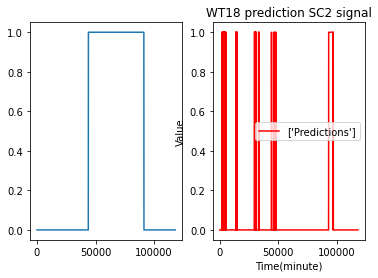

In [136]:
X_train = WT_temp[5].iloc[:, 0:22]
#X_test = WT_temp[3].iloc[int(0.7*(len(WT_temp[0]))):, 0:22]
X_test = WT_temp[13].iloc[:, 0:22]
y_train = WT_temp[5].iloc[:, [24,26]]
y_test = WT_temp[0].iloc[:, [24,26]]
predictions = rf.predict(X_test)
predictions = pd.DataFrame(predictions, columns = ['SC1', 'SC4'])
predictions = pd.concat((y_test, predictions), axis = 1)
print(predictions)
prediction_score = rf.score(X_test, y_test, sample_weight = None)
#print(prediction_score)
print(round(accuracy_score(y_test.iloc[:, 0], predictions.iloc[:, 3])*100.0,2))
#fig = plt.figure(figsize=(15,10))
#fig , (ax1, ax2) = plt.subplots(1,2)
#ax1.plot(predictions[predictions.columns[0]][:len(predictions)], ls = '-', ms = 1, label = ['Reality'])
#ax2.plot(predictions[predictions.columns[3]][:len(predictions)], ls = '-', ms = 1, label = ['Predictions'], color = 'r')
#plt.xlabel('Time(minute)')
#plt.ylabel('Value')
#plt.title('WT18 prediction SC2 signal')
#plt.legend(loc = 0)
#plt.show()
#print(predictions)


In [155]:


haha16_SC5 = [8, 9, 12]


for i in haha16_SC5:
    X_test = WT_temp[i].iloc[:, 0:22]
    y_test = WT_temp[i].iloc[:, [23,26,27]]
    predictions = rf.predict(X_test)
    predictions = pd.DataFrame(predictions, columns = ['SC3', 'SC4', 'SC5'])
    predictions = pd.concat((y_test, predictions), axis = 1)
    print(round(accuracy_score(y_test.iloc[:, 2], predictions.iloc[:, 5])*100.0,2), i)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    0.0s


60.36 8


[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    0.0s


91.81 9
99.34 12


[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed:    0.1s finished
